## Inspecting the WheatFspm model

The goal of this notebook is to inspect the prediction targets and observable state available in the WheatFspm model.

As a dataset, the NEMA model is used from Barillot et al. 2016 (H0, H3, and H15).

### Loading the dataset

These datasets were collected and converted in the WheatFspm repository.

In [7]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
sys.path.insert(1, os.path.join(sys.path[0], '../../'))  # for importing local packages from src

In [4]:
DATASET_NEMA_H0 = '../datasets/dataset_NEMA_NEMA_H0.csv'
DATASET_NEMA_H3 = '../datasets/dataset_NEMA_NEMA_H3.csv'
DATASET_NEMA_H15 = '../datasets/dataset_NEMA_NEMA_H15.csv'

In [13]:
from src.model.rc_dataset import ExperimentDataset

dataset_nema_h0 = ExperimentDataset(csv_path=DATASET_NEMA_H0)
dataset_nema_h3 = ExperimentDataset(csv_path=DATASET_NEMA_H3)
dataset_nema_h15 = ExperimentDataset(csv_path=DATASET_NEMA_H15)

In [14]:
print(dataset_nema_h3)

Dataset properties:
	n_runs:       1
	n_steps:    1200
	state_size:  21

Available targets: 
	input_air_temperature, input_humidity, input_Wind, input_PARi, output__axes__C_exudated, output__axes__SAM_temperature, output__axes__Total_Transpiration, output__axes__delta_teq, output__axes__delta_teq_roots, output__axes__mstruct, output__axes__sum_TT, output__axes__sum_respi_roots, output__axes__sum_respi_shoot, output__axes__teq_since_primordium, output__soils__Conc_Nitrates_Soil, output__soils__Tsoil, output__soils__mineralisation, output__soils__nitrates, output__organ_grains__R_grain_growth_starch, output__organ_grains__R_grain_growth_struct, output__organ_grains__S_Proteins, output__organ_grains__S_grain_starch, output__organ_grains__S_grain_structure, output__organ_grains__age_from_flowering, output__organ_grains__proteins, output__organ_grains__starch, output__organ_grains__structure, output__organ_phloem__amino_acids, output__organ_phloem__sucrose, output__organ_roots__AA_consumpti

### Inspecting the targets

The targets can be classified as follows:

- Inputs (meteorological)
- Outputs (Computed aggregate plant fitness signals)
  - Axes
  - Soils
  - Organs

In [22]:
dataset = dataset_nema_h3
run_id = 'NEMA_H3'

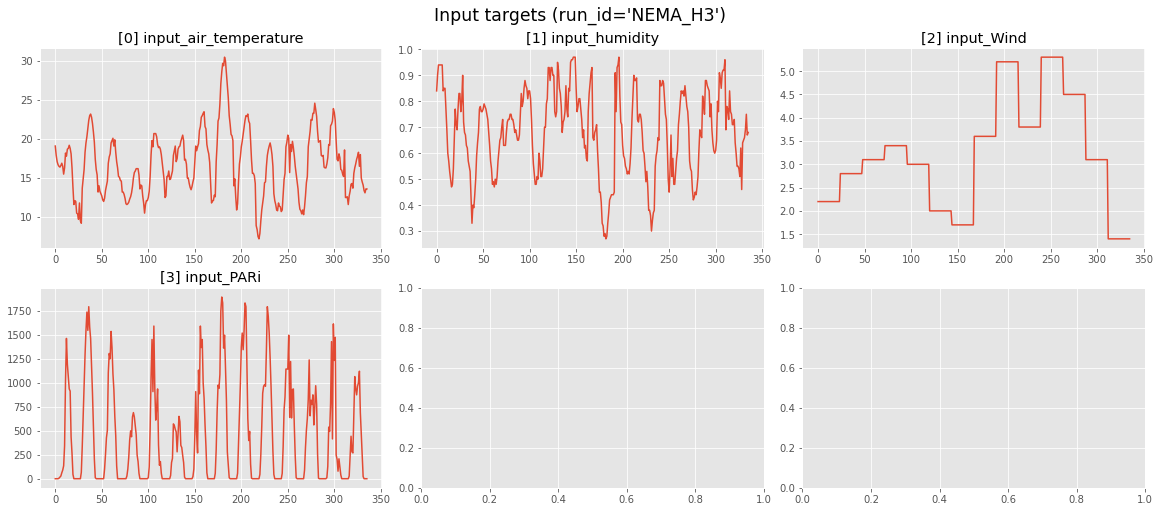

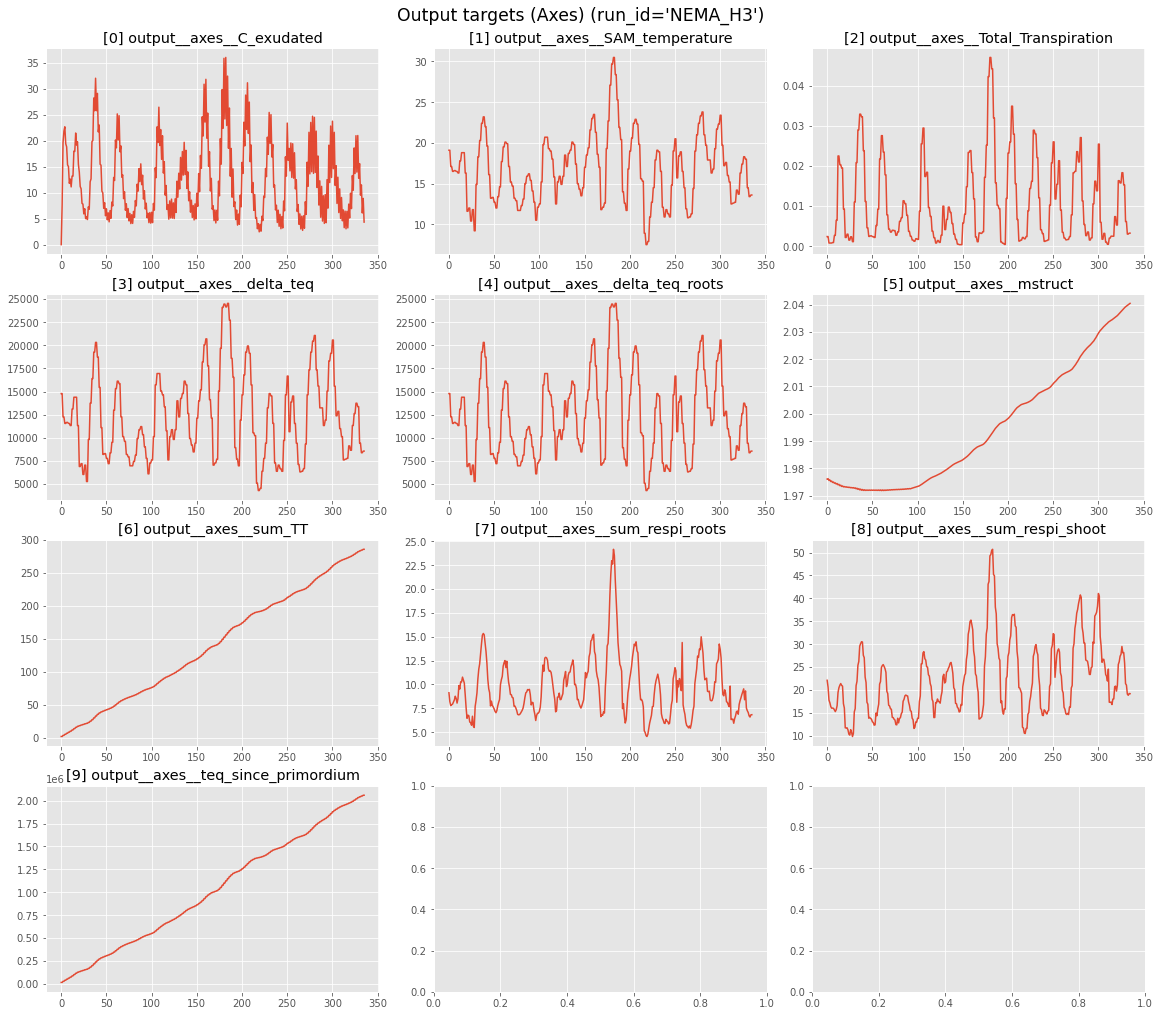

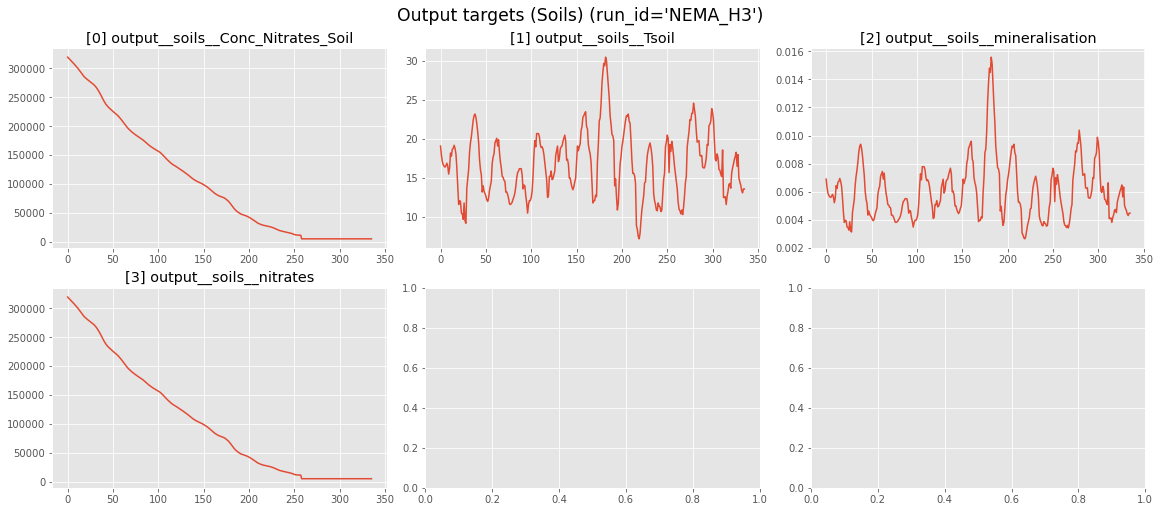

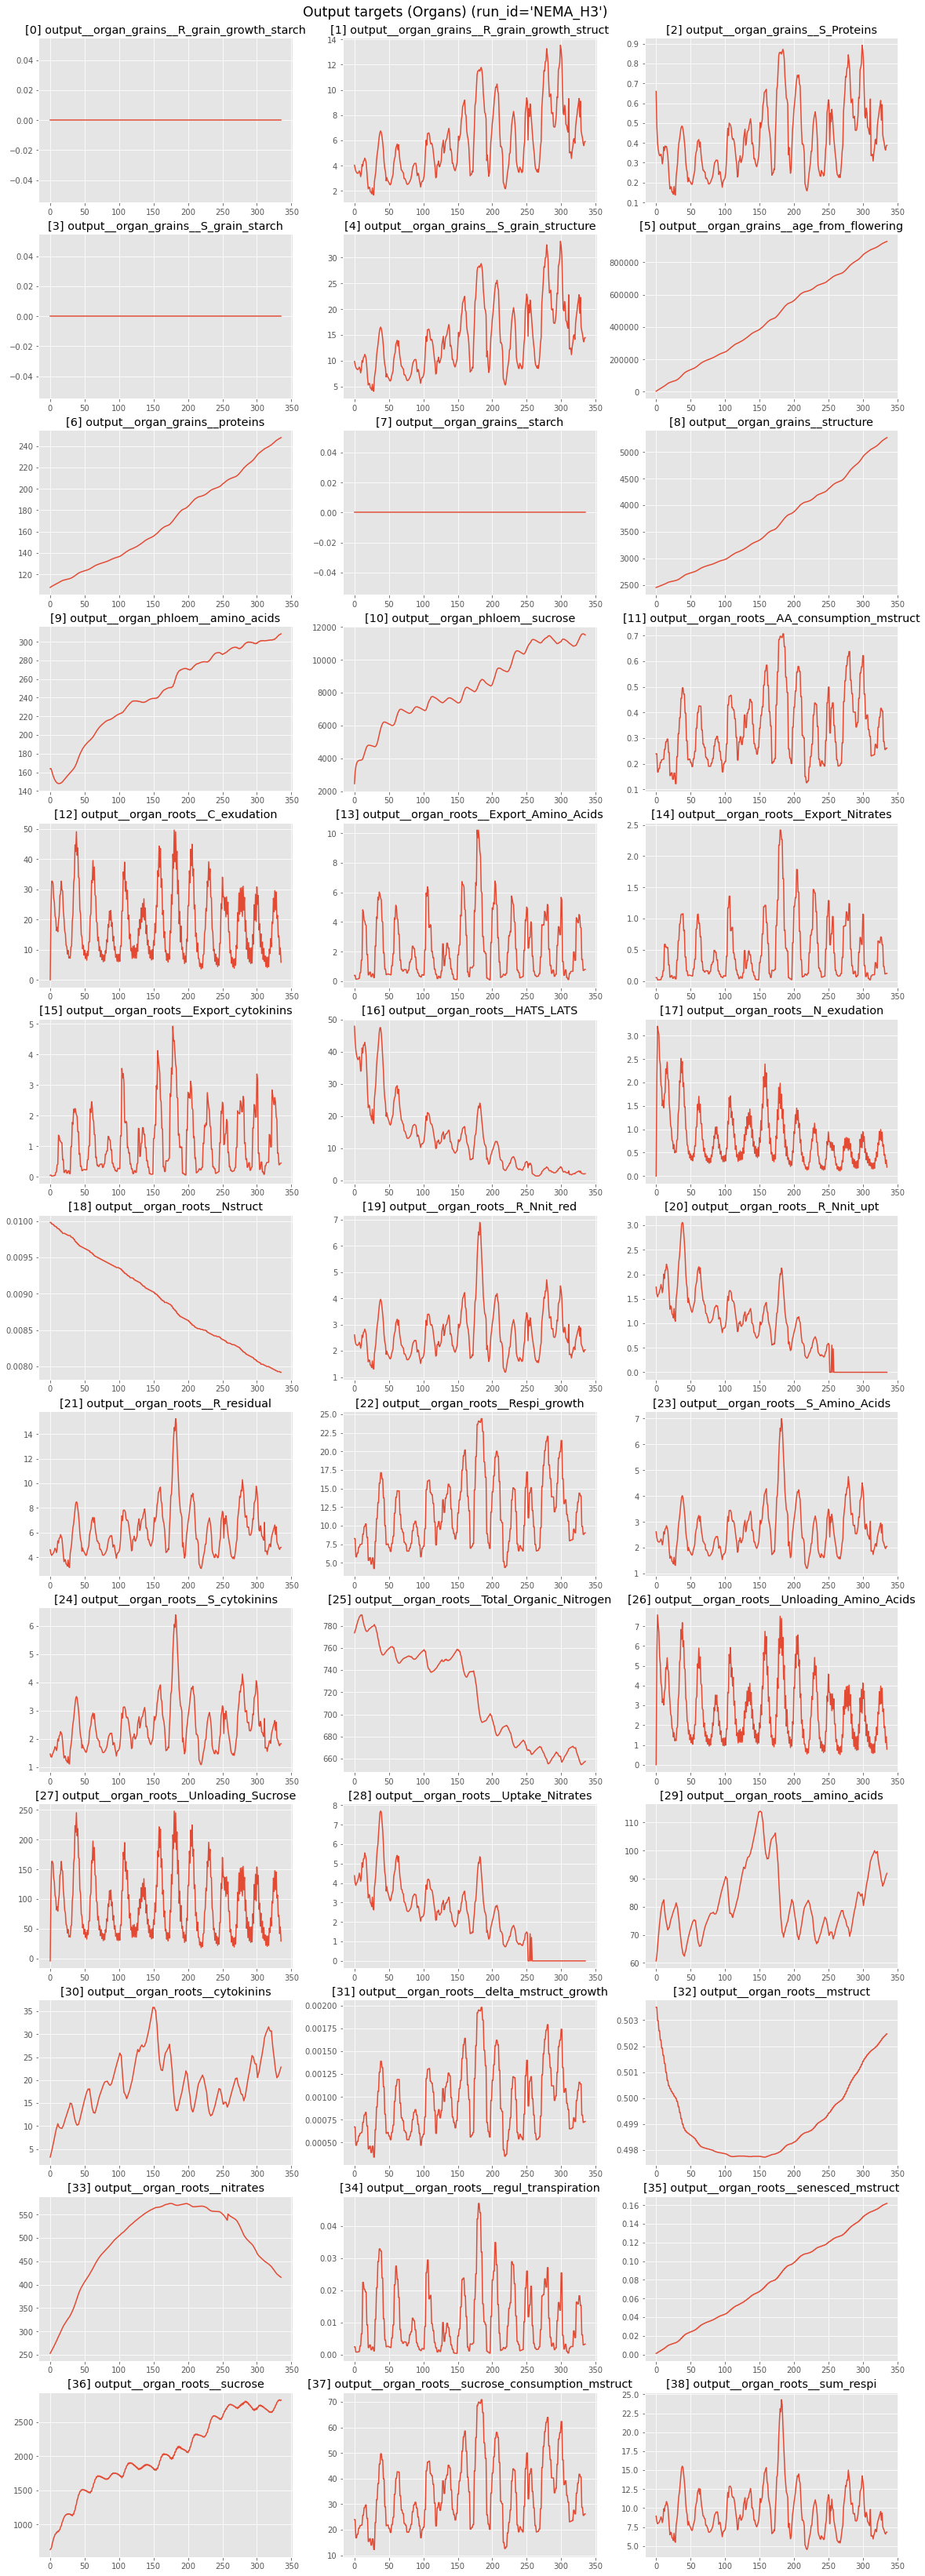

In [44]:
OFFSET = 0 * 24
MIN_T = OFFSET
MAX_T = MIN_T + 14 * 24

N_COLS = 3

targets = dataset.get_targets()

targets_input = [target for target in targets if target.startswith('input_')]
targets_axes = [target for target in targets if target.startswith('output__axes__')]
targets_soils = [target for target in targets if target.startswith('output__soils__')]
targets_organ = [target for target in targets if target.startswith('output__organ')]


target_class_names = ['Input targets', 'Output targets (Axes)', 'Output targets (Soils)', 'Output targets (Organs)']
target_classes = zip(target_class_names, [targets_input, targets_axes, targets_soils, targets_organ])

for class_name, targets in target_classes:
  with plt.style.context('ggplot'):
    n_rows = int(np.ceil(len(targets) / N_COLS))
    fig, ax = plt.subplots(n_rows, N_COLS, figsize=(16, 3.5 * n_rows), constrained_layout=True)

    for i, target in enumerate(targets):
      row, col = i // N_COLS, i % N_COLS

      data = dataset.get_target(target, run_id)
      data = data[MIN_T:MAX_T]

      ax[row, col].plot(data)
      ax[row, col].set_title(f'[{i}] {target}')

    fig.suptitle(f'{class_name} ({run_id=})', size='xx-large')
    plt.show()

### Inspecting the state variables

BIG NOTE: not every observed node has a time series for every state variable (e.g. a leaf and a stem may have different sets of observable states!)

In [32]:
dataset = dataset_nema_h3
run_id = 'NEMA_H3'

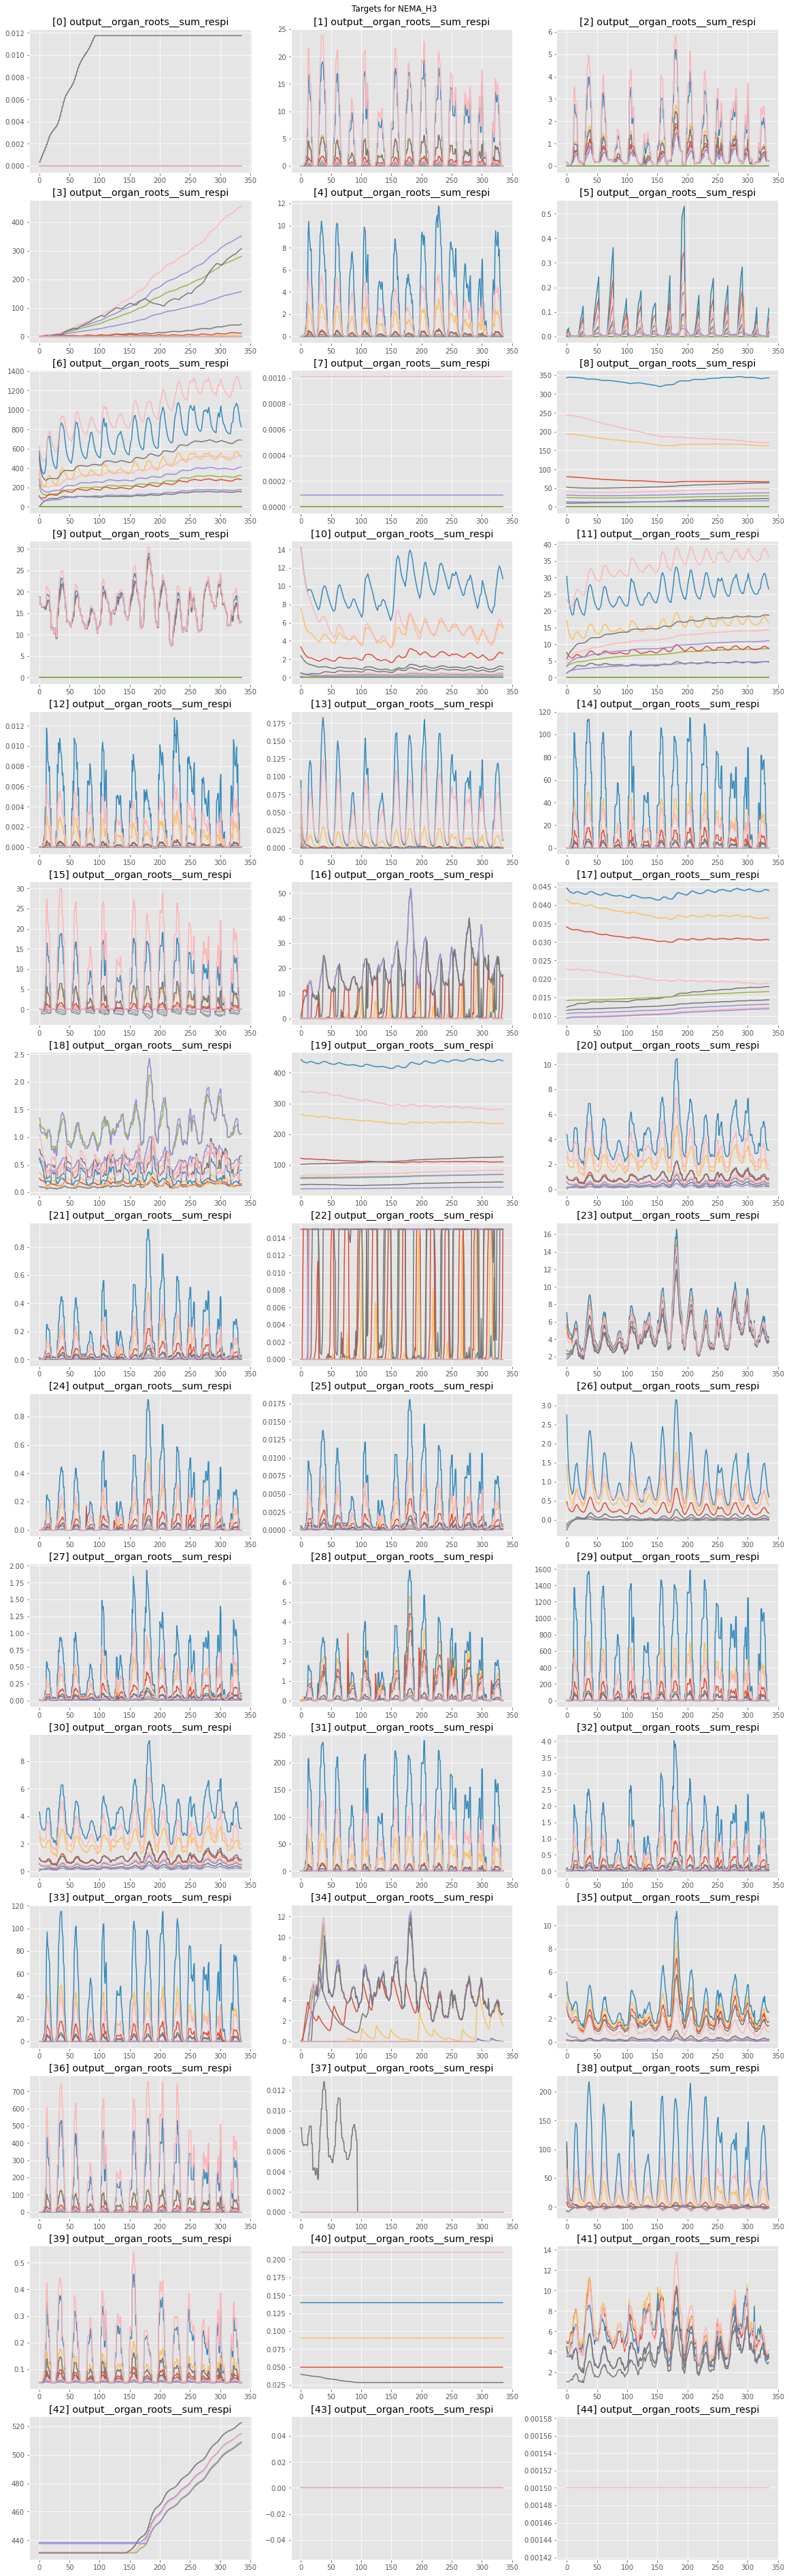

In [34]:
OFFSET = 0 * 24
MIN_T = OFFSET
MAX_T = MIN_T + 14 * 24

N_COLS = 3

state_vars = dataset.get_state_variables()

with plt.style.context('ggplot'):
  n_rows = int(np.ceil(len(state_vars) / N_COLS))
  fig, ax = plt.subplots(n_rows, N_COLS, figsize=(16, 3.5 * n_rows), constrained_layout=True)

  for i, state_var in enumerate(state_vars):
    row, col = i // N_COLS, i % N_COLS

    data = dataset.get_state(state_var, run_id)
    data = data[MIN_T:MAX_T]

    ax[row, col].plot(data)
    ax[row, col].set_title(f'[{i}] {target}')

  fig.suptitle(f'Targets for {run_id}')
  plt.show()